In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as mpatches
import seaborn as sns
import itertools
%matplotlib inline

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
#import lightgbm as lgb
#from lightgbm import LGBMClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.metrics import classification_report, accuracy_score, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix


import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
import time

seed=47

import os
#for dirname, _, filenames in os.walk('/Data'):
    #for filename in filenames:
       # print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('pre_processed_dataset.csv') 

<AxesSubplot:>

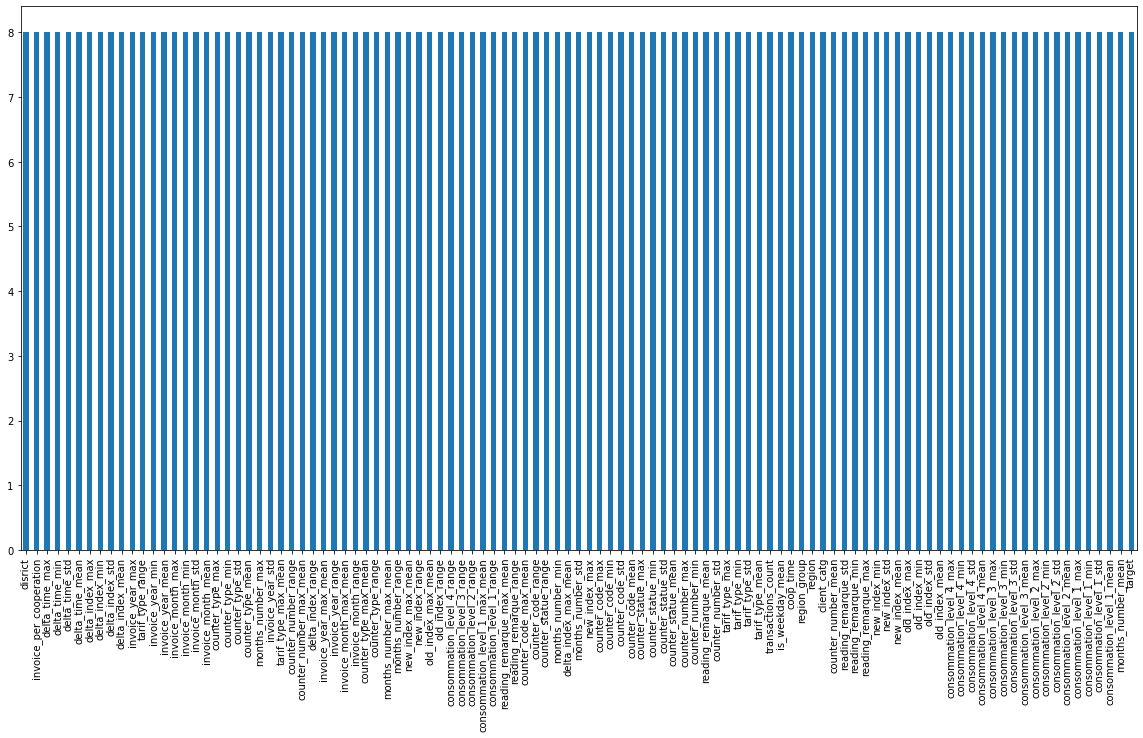

In [4]:
plt.figure(figsize=(20,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='bar')

In [9]:
df['target'].isna().sum().sum()

10931

In [8]:
not_fraud = df[(df['target'] == 0 )].count()[1]
fraud = df[(df['target'] == 1 )].count()[1]
print('No. of Non-fraudalent Cases: '+ str(not_fraud))
print('No. of Fraudalent Cases: '+ str(fraud))

No. of Non-fraudalent Cases: 105789
No. of Fraudalent Cases: 6837


In [13]:
df = df.dropna()

In [14]:
df.isna().sum()


disrict                  0
client_catg              0
region                   0
region_group             0
coop_time                0
                        ..
invoice_year_range       0
invoice_year_max_mean    0
delta_index_range        0
delta_index_max_mean     0
target                   0
Length: 105, dtype: int64

In [15]:
df

,disrict,client_catg,region,region_group,coop_time,is_weekday_mean,transactions_count,tarif_type_mean,tarif_type_std,tarif_type_min,...,months_number_max_mean,counter_type_range,counter_type_max_mean,invoice_month_range,invoice_month_max_mean,invoice_year_range,invoice_year_max_mean,delta_index_range,delta_index_max_mean,target
0,0.000000,0.0,0.000000,0.0,0.582524,0.028571,0.073394,0.040251,0.000000,0.142857,...,0.017515,0.0,0.000000,1.000000,0.227106,1.000000,0.721412,0.001192,0.788090,0.0
1,1.000000,0.0,0.020134,0.0,0.409709,0.054054,0.077982,0.040251,0.000000,0.142857,...,0.009348,0.0,0.000000,0.818182,0.270677,1.000000,0.657374,0.000899,0.788028,0.0
2,0.222222,0.0,0.671141,1.0,0.786408,0.055556,0.034404,0.040251,0.000000,0.142857,...,0.009481,0.0,0.000000,0.818182,0.189676,1.000000,0.739702,0.002560,0.788085,0.0
3,1.000000,0.0,0.013423,0.0,0.537864,0.050000,0.038991,0.040251,0.000000,0.142857,...,0.004713,0.0,0.000000,0.818182,0.229086,0.500000,0.312570,0.000012,0.788415,0.0
4,0.222222,0.0,0.677852,1.0,0.120388,0.285714,0.025229,0.040251,0.000000,0.142857,...,0.000846,0.0,0.000000,0.909091,0.167116,0.285714,0.196191,0.001997,0.788043,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123552,0.000000,0.0,0.000000,0.0,0.304854,0.200000,0.073394,0.289597,0.700486,0.095238,...,0.010998,1.0,0.026667,1.000000,0.291209,0.642857,0.354148,0.001358,0.788062,0.0
123553,0.000000,0.0,0.000000,0.0,0.955340,0.000000,0.002294,0.007318,0.000000,0.095238,...,0.003666,0.0,0.000000,0.727273,0.204082,0.142857,0.092051,0.000026,0.788044,0.0
123554,0.333333,0.0,0.704698,1.0,0.166990,0.000000,0.087156,0.529420,0.747623,0.142857,...,0.000275,1.0,0.070000,0.727273,0.186636,0.428571,0.290447,0.000735,0.788113,0.0
123555,0.333333,0.0,0.704698,1.0,0.188350,0.194444,0.075688,0.411657,0.730415,0.142857,...,0.010403,1.0,0.042424,0.909091,0.211982,0.500000,0.394622,0.000921,0.788094,0.0
